In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Training Data: 

Janurary 2014 to June 2016

In [103]:
df = pd.read_csv('train_lending_club.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236846 entries, 0 to 236845
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   issue_d                   236846 non-null  object 
 1   sub_grade                 236846 non-null  object 
 2   term                      236846 non-null  object 
 3   home_ownership            236846 non-null  object 
 4   fico_range_low            236846 non-null  float64
 5   total_acc                 236846 non-null  float64
 6   pub_rec                   236846 non-null  float64
 7   revol_util                236846 non-null  float64
 8   annual_inc                236846 non-null  float64
 9   int_rate                  236846 non-null  float64
 10  dti                       236846 non-null  float64
 11  purpose                   236846 non-null  object 
 12  mort_acc                  236846 non-null  float64
 13  loan_amnt                 236846 non-null  f

## Data Cleaning Function

In [105]:
def cleaning_data(df):
    
    # rescale the annual_income column: using log
    annual_inc = np.log(df['annual_inc'])
    # add this column
    df['log_annual_inc'] = annual_inc
    
    # take the average of the "low-" and "high-" range fico scores for each borrrower    
    FICO = df[['fico_range_low', 'fico_range_high']].mean(axis=1)
    # add this column
    df['fico'] = FICO
    
    # drop irrelevant columns
    df2 = df.drop(columns = ['issue_d', 'sub_grade', 'term', 'home_ownership', 'fico_range_low', 'annual_inc', 
                             'application_type','verification_status', 'addr_state', 'initial_list_status', 
                             'fico_range_high', 'id'])
    
    # handle the missing/underfined data
    df2.replace(to_replace = [np.inf, -np.inf], 
                value = np.nan, 
                inplace = True)
    
    # drop NaNs
    df2.dropna(inplace= True)
    
    # check for NaN    
    print( " \n Checking for NaNs: \n \n", df2.isna().sum() )
    
    return df2

In [106]:
# call the data into the function


loans = cleaning_data(df)

 
 Checking for NaNs: 
 
 total_acc                   0
pub_rec                     0
revol_util                  0
int_rate                    0
dti                         0
purpose                     0
mort_acc                    0
loan_amnt                   0
installment                 0
pub_rec_bankruptcies        0
revol_bal                   0
open_acc                    0
emp_length                  0
loan_status                 0
time_to_earliest_cr_line    0
log_annual_inc              0
fico                        0
dtype: int64


C:\Newfolder\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
# view the cleaned data


loans.head()

,total_acc,pub_rec,revol_util,int_rate,dti,purpose,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,open_acc,emp_length,loan_status,time_to_earliest_cr_line,log_annual_inc,fico
0,18.0,0.0,86.8,16.99,15.16,credit_card,1.0,17775.0,441.66,0.0,17264.0,11.0,2.0,1,478656.0,10.607575,662.0
1,26.0,0.0,103.5,15.61,16.74,credit_card,4.0,29175.0,703.45,0.0,6725.0,8.0,3.0,1,541728.0,10.985293,742.0
2,47.0,0.0,11.4,7.90,20.34,debt_consolidation,1.0,6000.0,187.75,0.0,7613.0,27.0,1.0,1,657590.4,10.596635,702.0
3,26.0,0.0,56.2,16.99,23.15,debt_consolidation,7.0,15600.0,387.62,0.0,14173.0,9.0,11.0,1,328838.4,11.156251,667.0
4,15.0,1.0,67.1,14.98,17.88,vacation,1.0,10000.0,346.56,0.0,2549.0,8.0,2.0,1,305164.8,11.695247,702.0


## Exploratory Data Analysis

In [108]:
# check basic statistics of the data

loans.describe()

,total_acc,pub_rec,revol_util,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,open_acc,emp_length,loan_status,time_to_earliest_cr_line,log_annual_inc,fico
count,236840.000000,236840.000000,236840.000000,236840.000000,236840.000000,236840.000000,236840.000000,236840.000000,236840.000000,2.368400e+05,236840.000000,236840.000000,236840.000000,2.368400e+05,236840.000000,236840.000000
mean,25.573391,0.239351,52.846637,12.603131,18.534255,1.733305,14626.443379,441.924391,0.138325,1.695644e+04,11.807596,5.990386,0.831599,5.264205e+05,11.094543,696.352312
std,12.196261,0.673020,24.012396,4.481979,9.214346,2.044632,8611.658725,257.215032,0.391761,2.382927e+04,5.592365,4.238304,0.374222,2.413102e+05,0.543639,30.933032
min,2.000000,0.000000,0.000000,5.320000,0.000000,0.000000,1000.000000,14.770000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.711360e+04,6.396930,662.000000
25%,17.000000,0.000000,35.000000,9.170000,12.050000,0.000000,8000.000000,254.067500,0.000000,6.127000e+03,8.000000,2.000000,1.000000,3.603744e+05,10.736397,672.000000
50%,24.000000,0.000000,53.000000,12.290000,17.890000,1.000000,12450.000000,378.200000,0.000000,1.139900e+04,11.000000,6.000000,1.000000,4.784832e+05,11.082143,687.000000
75%,32.000000,0.000000,71.200000,15.310000,24.520000,3.000000,20000.000000,588.372500,0.000000,2.043100e+04,15.000000,11.000000,1.000000,6.470496e+05,11.429544,712.000000
max,169.000000,86.000000,182.800000,30.990000,999.000000,47.000000,40000.000000,1534.880000,9.000000,2.560703e+06,76.000000,11.000000,1.000000,2.240525e+06,16.074465,847.500000


# How many loans were paid in full, based on loan pupose?

<Axes: xlabel='purpose', ylabel='count'>

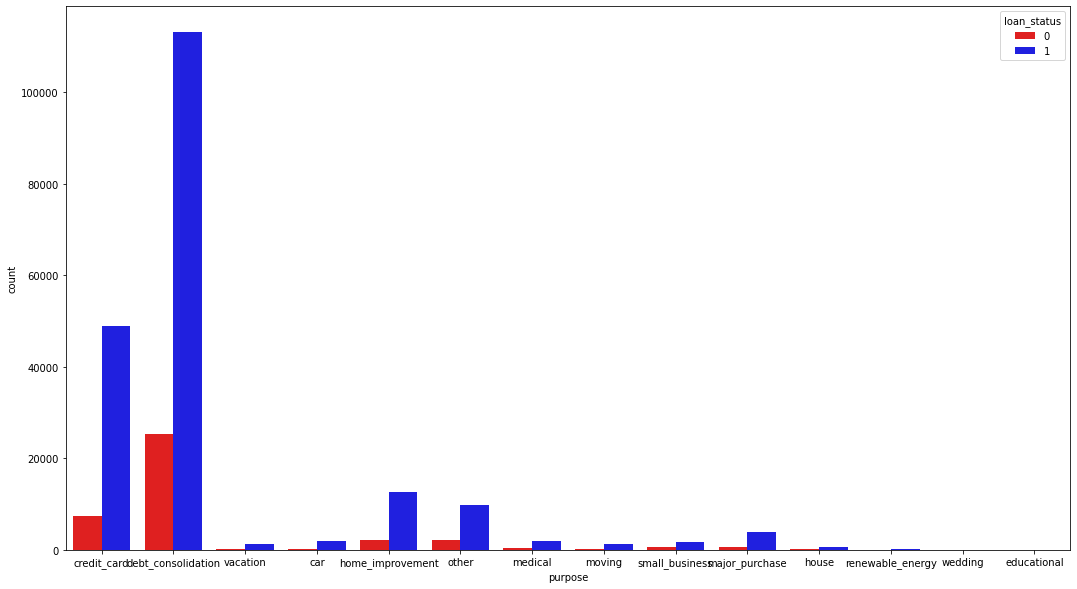

In [109]:
plt.figure(figsize= (18, 10))
sns.countplot(x = loans['purpose'],
              
              hue = df['loan_status'],
              palette = ['red', 'blue'])


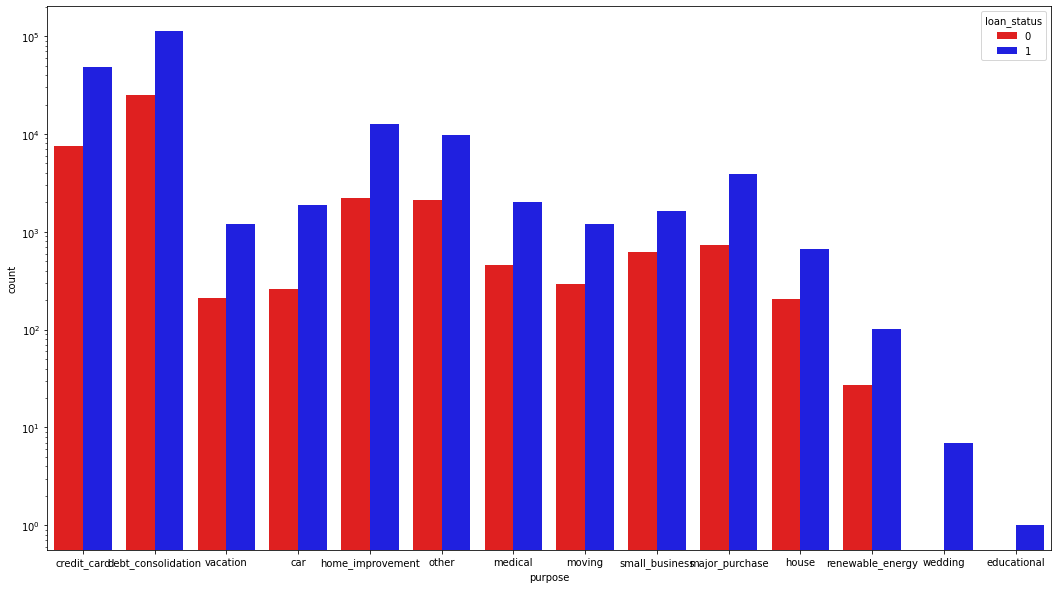

In [110]:
# RESCALE to show the counts of less dominant "loan purpose" like education

plt.figure(figsize= (18, 10))
sns.countplot(x = loans['purpose'],
              hue = df['loan_status'],
             
              palette = ['red', 'blue'])

# to help with the scaling (so all data/bars/plots can show):
plt.yscale('log')  # Apply log scale

### Insights:
* Loans that are <span style="color: red;">Fully paid = 0</span>, and <span style="color: blue;">Not fully paid = 1</span>
* Between 2014 - 2016, majority of borrowers used the money for _debt\_consolidation_ and _credit cards_
* Education had the least number of loans collected
* No loan under _Education_ and _Wedding_ was paid in full with the latter having more debt

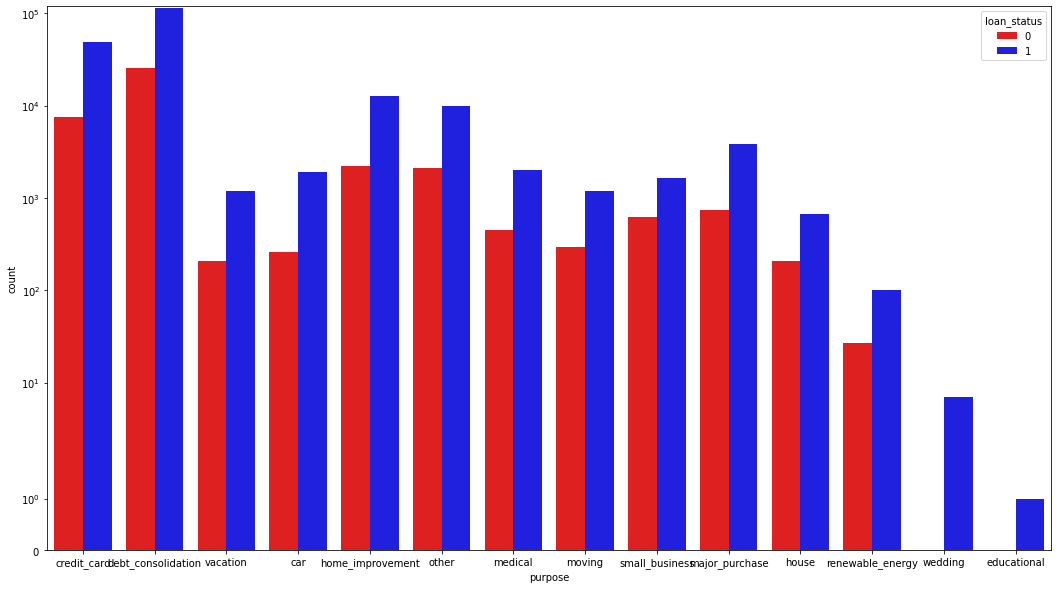

In [111]:
# RESCALE to show the counts of less dominant "loan purpose" like education

plt.figure(figsize= (18, 10))
sns.countplot(x = loans['purpose'],
              hue = df['loan_status'],
             
              palette = ['red', 'blue'])

# to help with the scaling (so all data/bars/plots can show):
plt.yscale('symlog')  # Apply log scale

### Deeper Dive in to Education & Wedding

In [112]:
# filter the data by 'purpose'
# to just education and wedding

loans[ (loans['purpose'] == 'educational') | (loans['purpose'] == 'wedding') ].sort_values(by= 'int_rate')

,total_acc,pub_rec,revol_util,int_rate,dti,purpose,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,open_acc,emp_length,loan_status,time_to_earliest_cr_line,log_annual_inc,fico
89151,56.0,1.0,42.8,9.99,8.11,wedding,0.0,3600.0,116.15,1.0,10778.0,19.0,11.0,1,825552.0,10.968198,677.0
93948,77.0,0.0,75.2,11.53,19.62,educational,0.0,2200.0,72.58,0.0,29017.0,51.0,8.0,1,520646.4,11.074421,662.0
40915,23.0,0.0,33.8,12.49,24.16,wedding,0.0,6000.0,200.70,0.0,10425.0,11.0,1.0,1,218332.8,10.308953,692.0
52727,20.0,0.0,97.8,14.99,11.80,wedding,0.0,14000.0,485.25,0.0,9386.0,5.0,11.0,1,373420.8,11.608236,682.0
4969,8.0,0.0,60.7,18.92,1.74,wedding,0.0,5500.0,201.39,0.0,1701.0,8.0,0.0,1,115862.4,10.341742,702.0
14329,49.0,5.0,28.1,18.92,10.91,wedding,3.0,5000.0,183.08,1.0,8665.0,17.0,2.0,1,565401.6,12.072541,677.0
39738,21.0,0.0,75.6,25.89,30.42,wedding,1.0,14950.0,601.47,0.0,27207.0,16.0,11.0,1,1099267.2,11.314475,712.0
96135,14.0,0.0,8.1,25.99,8.33,wedding,0.0,23100.0,691.49,0.0,1017.0,3.0,0.0,1,260150.4,11.512925,707.0


### Insights:
* There are more borrowers for wedding than for education (see 'purpose' column)
* Interest rate for wedding borrowers went as high as ~26% and education was less than half of that

# What is the average interest rate for each _Purpose_ ?

In [113]:
loans['int_rate'].groupby(by = loans['purpose']).mean().sort_values()

purpose
credit_card           10.976304
educational           11.530000
car                   11.888936
major_purchase        12.367448
home_improvement      12.512215
debt_consolidation    12.983961
vacation              13.880177
medical               14.145555
other                 14.233732
moving                15.367108
renewable_energy      15.905938
small_business        16.701099
house                 17.159396
wedding               18.170000
Name: int_rate, dtype: float64

### Insights:
* On average, <span style="color: green;"> Weddings </span> had more interest-rate than any other category. <span style="color: green;"> Housing </span> and <span style="color: green;"> small business </span> followed
* <span style="color: green;"> Credit card </span> had the least amount of interest-rate among all categories

# Is there a Correlation between FICO score and Interest Rate?

In [114]:
from scipy.stats import pearsonr

Text(0.05, 0.95, 'r = -0.389\np = 0.000')

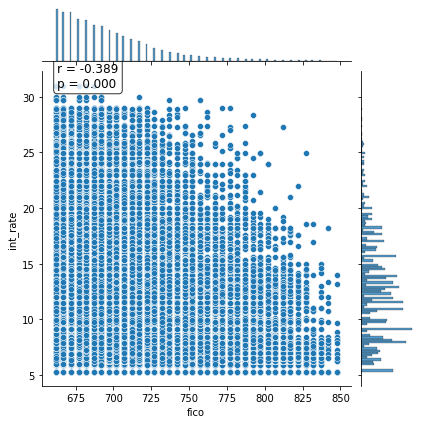

In [115]:
g = sns.jointplot(data = loans,
                  x = 'fico',
                  y = 'int_rate')

# Calculate the correlation coefficient
r, p_value = pearsonr(loans['fico'], loans['int_rate'])

# Add the calculated correlation text to the plot
g.ax_joint.text(0.05, 0.95, 
                f'r = {r:.3f}\np = {p_value:.3f}',
                transform = g.ax_joint.transAxes, 
                fontsize = 12, 
                bbox = dict(boxstyle = 'round', 
                            facecolor = 'white', 
                            alpha = 0.8))

### Insights:
* There is a weak negative correlation between FICO score and Interest Rate
* A low interest rate is not a strong indicator of high FICO score; and vice versa

# FICO vs. Interest Rate: How does the trend differ in Loan Status?

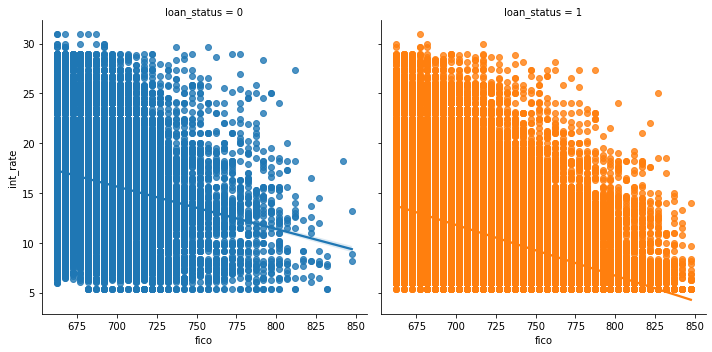

In [116]:
sns.lmplot(data = loans,
           x = 'fico',
           y = 'int_rate',
           col = 'loan_status',
           hue = 'loan_status')

###### # Get the correlation coefficient for each plot

In [117]:
# Fully paid loans: when loan_status is zero

loan_zero = loans[loans['loan_status'] == 0]
r_loan_zero, _ = pearsonr(loan_zero['fico'], loan_zero['int_rate'])

print("Fully Paid Loans (loan_status = 0), correlation coefficient is: ", round(r_loan_zero, 3))

Fully Paid Loans (loan_status = 0), correlation coefficient is:  -0.225


In [118]:
# Not fully paid loans: when loan_status is one

loan_one = loans[loans['loan_status'] == 1]
r_loan_one, _ = pearsonr(loan_one['fico'], loan_one['int_rate'])

print("Not Fully Paid Loans (loan_status = 1), correlation coefficient is: ", round(r_loan_one, 3))

Not Fully Paid Loans (loan_status = 1), correlation coefficient is:  -0.395


### Insights
* For _Not Fully Paid Loans_ , <span style="color: green;"> high FICO score </span> scores minimally contributes to <span style="color: green;"> lowering the interest rate </span>. 
    * Similarly, a high interest rate does not necessarily predict that FICO score will be low
* There is <span style="color: green;"> NO connection </span>  between FICO score and interest rate for _Fully Paid Loans_

# Data Preparation


## Categorical Features

* Observe that the **purpose** column is "categorical"
* This implies, there is need for transformation (to numerical): using dummy variables -this way, the library _sklearn_ will be able to understand them
* We do this using the function: pd.get_dummies( )
* This function, "drops" the **purpose** column and then creates a unique column for each category

In [119]:
## Observe the "purpose" column

loans['purpose'].value_counts()

purpose
debt_consolidation    138368
credit_card            56322
home_improvement       14823
other                  11922
major_purchase          4616
medical                 2459
small_business          2274
car                     2152
moving                  1480
vacation                1410
house                    878
renewable_energy         128
wedding                    7
educational                1
Name: count, dtype: int64

In [120]:
# create a new dataset with this new dummy variables

loans_final_df = pd.get_dummies(data = loans,
                                columns = ['purpose'],   # ensure this is inputted as a list # see documentation
                                drop_first = True)

# since educational and wedding (Purpose) are only 8 in total, let's drop it
loans_final_df = loans_final_df.drop(columns = ['purpose_educational', 'purpose_wedding'])

# view this update
loans_final_df.head()

,total_acc,pub_rec,revol_util,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,18.0,0.0,86.8,16.99,15.16,1.0,17775.0,441.66,0.0,17264.0,...,False,False,False,False,False,False,False,False,False,False
1,26.0,0.0,103.5,15.61,16.74,4.0,29175.0,703.45,0.0,6725.0,...,False,False,False,False,False,False,False,False,False,False
2,47.0,0.0,11.4,7.90,20.34,1.0,6000.0,187.75,0.0,7613.0,...,True,False,False,False,False,False,False,False,False,False
3,26.0,0.0,56.2,16.99,23.15,7.0,15600.0,387.62,0.0,14173.0,...,True,False,False,False,False,False,False,False,False,False
4,15.0,1.0,67.1,14.98,17.88,1.0,10000.0,346.56,0.0,2549.0,...,False,False,False,False,False,False,False,False,False,True


# Model Training

In [121]:
from sklearn.model_selection import train_test_split

X = loans_final_df.drop(['loan_status'], axis = 1)
y = loans_final_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
# Create Instance of Decision classifier
from sklearn.ensemble import RandomForestClassifier

rndforest_100 = RandomForestClassifier(n_estimators= 100)

In [123]:
# Fit data

rndforest_100.fit(X = X_train,
                  y = y_train)

RandomForestClassifier()

### Prediction

In [124]:
pred_initial = rndforest_100.predict(X_test)

In [125]:
# create classification report from the predictions

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(

    classification_report(y_true = y_test,
                          y_pred = pred_initial)

)

print(

    confusion_matrix(y_true = y_test,
                     y_pred = pred_initial)

)


              precision    recall  f1-score   support

           0       0.60      0.21      0.31     11938
           1       0.86      0.97      0.91     59114

    accuracy                           0.84     71052
   macro avg       0.73      0.59      0.61     71052
weighted avg       0.82      0.84      0.81     71052

[[ 2492  9446]
 [ 1649 57465]]


### Key Insight:

* Performance of the model good with overall $accuracy = 84\%$
* Only < 5% of the data was misclassified. i.e.: 
    * from 236,840 borrowers, the loan (payment) status of 11,091 were wrongly classified
* It is important to point out $recall = 97\% $, which tells us that:
      * Of all the instances of **Not Fully Paid Loans**, 97% were correctly identified 
      * This can be a good thing as our model is very effective in (or sensitive to) catching bad borrowers 
* Although, the data is highly imbalance (see 'support'), hence the usefulness of _f1-score_ $ = 91\%$ striking a good balance
* Moving forward, let's try to <span style="color: red;"> tune our hyperparameter </span>  $n\_estimators$, in attempt to find the optimal number of estimators
* Perhaps this will improve the model's performance

In [126]:
# Test for higher number of estimators
rndforest_200 = RandomForestClassifier(n_estimators= 200)
rndforest_300 = RandomForestClassifier(n_estimators= 300)


# Fit data
rndforest_200.fit(X = X_train,
                  y = y_train)
rndforest_300.fit(X = X_train,
                  y = y_train)


# Predict
pred_200 = rndforest_200.predict(X_test)
pred_300 = rndforest_300.predict(X_test)


In [127]:
# Model Performance
print("Number of Estimators = 200: ")
print(classification_report(y_true = y_test,
                          y_pred = pred_200))

print(confusion_matrix(y_true = y_test,
                     y_pred = pred_200))


print(" \n \n Number of Estimators = 300: ")
print(classification_report(y_true = y_test,
                          y_pred = pred_300))

print(confusion_matrix(y_true = y_test,
                     y_pred = pred_300))

Number of Estimators = 200: 
              precision    recall  f1-score   support

           0       0.62      0.20      0.31     11938
           1       0.86      0.97      0.91     59114

    accuracy                           0.84     71052
   macro avg       0.74      0.59      0.61     71052
weighted avg       0.82      0.84      0.81     71052

[[ 2434  9504]
 [ 1519 57595]]
 
 
 Number of Estimators = 300: 
              precision    recall  f1-score   support

           0       0.62      0.20      0.30     11938
           1       0.86      0.97      0.91     59114

    accuracy                           0.84     71052
   macro avg       0.74      0.59      0.61     71052
weighted avg       0.82      0.84      0.81     71052

[[ 2390  9548]
 [ 1495 57619]]


### Key Insight

* Performance of the model did not change significantly with 200 and 300 iterations, hence we 
* finalize using the model with **100 estimators** having a good overall $accuracy = 84%$

# Apply this model on a fresh dataset

In [ ]:
# Get a new dataset and use it on the model

In [128]:
new_df = pd.read_csv('test_lending_club.csv')

new_df.head()

,issue_d,sub_grade,term,home_ownership,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,...,pub_rec_bankruptcies,addr_state,initial_list_status,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status,time_to_earliest_cr_line
0,2016-07-01,A4,36 months,MORTGAGE,830.0,13.0,0.0,12.0,105682.0,7.99,...,0.0,TX,w,834.0,4266.0,84759443,5.0,11.0,1.0,789004.8
1,2016-07-01,B5,36 months,RENT,660.0,25.0,0.0,59.4,68000.0,11.49,...,0.0,CA,w,664.0,6944.0,84433407,11.0,6.0,1.0,294624.0
2,2016-07-01,D2,36 months,MORTGAGE,660.0,17.0,1.0,40.9,75000.0,17.99,...,1.0,AZ,w,664.0,5528.0,84646007,6.0,3.0,1.0,349747.2
3,2016-07-01,A1,36 months,RENT,740.0,36.0,0.0,27.7,114000.0,5.32,...,0.0,CA,w,744.0,25912.0,84477434,16.0,1.0,1.0,691632.0
4,2016-07-01,C4,60 months,MORTGAGE,680.0,14.0,0.0,44.3,47000.0,14.49,...,0.0,OH,w,684.0,4205.0,84525798,12.0,2.0,0.0,591667.2


### NEW test Data 

July 2016 to December 2018

In [129]:
len(new_df)

95019

In [130]:
# Clean the dataset

new_loans = cleaning_data(new_df)

 
 Checking for NaNs: 
 
 total_acc                   0
pub_rec                     0
revol_util                  0
int_rate                    0
dti                         0
purpose                     0
mort_acc                    0
loan_amnt                   0
installment                 0
pub_rec_bankruptcies        0
revol_bal                   0
open_acc                    0
emp_length                  0
loan_status                 0
time_to_earliest_cr_line    0
log_annual_inc              0
fico                        0
dtype: int64


C:\Newfolder\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [131]:
# create a new dataset with this new dummy variables

new_loans_df = pd.get_dummies(data = new_loans,
                              columns = ['purpose'],   # ensure this is inputted as a list # see documentation
                              drop_first = True)

# this new data set does not have "Purpose: educational - and - wedding"

# view this update
new_loans_df.head()

,total_acc,pub_rec,revol_util,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation
0,13.0,0.0,12.0,7.99,7.25,9.0,15000.0,469.98,0.0,4266.0,...,False,False,False,True,False,False,False,False,False,False
1,25.0,0.0,59.4,11.49,34.49,0.0,5000.0,164.86,0.0,6944.0,...,False,False,False,False,False,False,True,False,False,False
2,17.0,1.0,40.9,17.99,13.20,3.0,8000.0,289.18,1.0,5528.0,...,True,False,False,False,False,False,False,False,False,False
3,36.0,0.0,27.7,5.32,12.90,0.0,16000.0,481.84,0.0,25912.0,...,True,False,False,False,False,False,False,False,False,False
4,14.0,0.0,44.3,14.49,13.89,1.0,14000.0,329.33,0.0,4205.0,...,True,False,False,False,False,False,False,False,False,False


In [132]:
# get predictors & drop response

X_new = new_loans_df.drop(['loan_status'], axis = 1)

In [133]:
# Use the already built model to predict response

prediction_new_loans = rndforest_100.predict(X_new) 

In [134]:
# create a new column for the predicted response

new_loans['NEW loan_status'] = prediction_new_loans

In [135]:
# view the outcome

new_loans.head()

,total_acc,pub_rec,revol_util,int_rate,dti,purpose,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,revol_bal,open_acc,emp_length,loan_status,time_to_earliest_cr_line,log_annual_inc,fico,NEW loan_status
0,13.0,0.0,12.0,7.99,7.25,major_purchase,9.0,15000.0,469.98,0.0,4266.0,5.0,11.0,1.0,789004.8,11.568190,832.0,1
1,25.0,0.0,59.4,11.49,34.49,other,0.0,5000.0,164.86,0.0,6944.0,11.0,6.0,1.0,294624.0,11.127263,662.0,1
2,17.0,1.0,40.9,17.99,13.20,debt_consolidation,3.0,8000.0,289.18,1.0,5528.0,6.0,3.0,1.0,349747.2,11.225243,662.0,1
3,36.0,0.0,27.7,5.32,12.90,debt_consolidation,0.0,16000.0,481.84,0.0,25912.0,16.0,1.0,1.0,691632.0,11.643954,742.0,1
4,14.0,0.0,44.3,14.49,13.89,debt_consolidation,1.0,14000.0,329.33,0.0,4205.0,12.0,2.0,0.0,591667.2,10.757903,682.0,1


### Check to see the model performance in predicting the response
* original response variable (came in with with data), **y_true** = <span style="color: blue;"> new_loans[ 'loan_status' ] </span> 
* new prediction, **y_pred** = <span style="color: red;"> prediction_new_loans </span> 

In [143]:
# Manually: build a simple function to calculate the *accuracy, *recall *precision and *f1-score

def classification_metrics(y_true, y_pred):
    
    """
    tp - true positive
    fp - false positive
    fn - false negative
    tn - true negative
    
    Reference Wikipedia explanation on "Confusion Matrix" ---https://en.wikipedia.org/wiki/Confusion_matrix 
    """
    # keep counts
    tp = fp = fn = tn = 0

    # on both y_true and y_pred, run through every element and make relevant comparisms
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1    # update true positive
            
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1    # update false positive
            
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1    # update false negative
            
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1    # update true negative

    # implementing formulas
    accuracy = (tp + tn) / len(y_true)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, recall, precision, f1


In [144]:
acc, rec, pre, f1 = classification_metrics(y_true = np.array(new_loans['loan_status']) , 
                              y_pred = np.array(prediction_new_loans))

print('Accuracy:', round(acc, 3))
print('Recall: ', round(rec, 3))
print('Precision: ', round(pre, 3))
print('F1-score: ', round(f1, 3))

Accuracy: 0.866
Recall:  0.97
Precision:  0.883
F1-score:  0.924


### Key Insights:

* In our new data, overall, the model performed better than in training
    * **87% accuracy** vs. training model of 84%
    * 97% recall (same as in training)
    * **improved precision** of 88% vs. 86% in training
    * f1-score of 92%, a better balance than in training (91%)
* Note the above results takes the positive class as 1 (i.e. Loans that are not fully paid)
* Again, using 100 estimators for our hyperparameter